In [1]:
sp.random.seed(0)

In [2]:
x = sp.stats.norm(0, 2).rvs(1000)

In [3]:
np.var(x)

3.8969378252486169

In [4]:
np.var(x, ddof=1)

3.9008386639125292

# SciPy를 이용한 확률 분포 분석

In [7]:
import scipy as sp

rv = sp.stats.norm() # 가우시안 정규 분포 객체, # 모수 고정을 통해, frozen이 나온다
type(rv)             

scipy.stats._distn_infrastructure.rv_frozen

In [8]:
# loc = 기대값
# scale = 표준편차
rv = sp.stats.norm(loc=1, scale=2)

In [9]:
# pdf = 확률 밀도 함수 (probability density function)
# pmf = 확률 질량 함수 (probability mass function)
# cdf = 누적 분포 함수 (cumulative distribution function)
# rvs = 랜덤 샘플 생성 (random variable sampling)

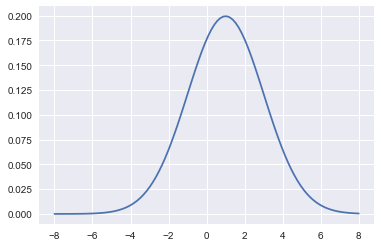

In [10]:
xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.show()

PDF의 높이가 0.2 ...  
1보다 크게 만드려면 어떻게 해야 하는가?

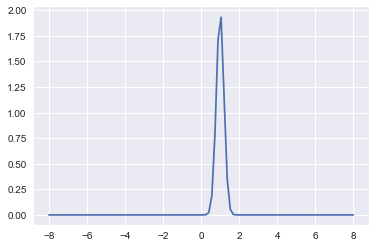

In [29]:
rv = sp.stats.norm(loc=1, scale=2/10)

xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.show()

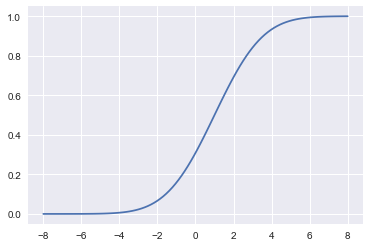

In [11]:
xx = np.linspace(-8, 8, 100)
cdf = rv.cdf(xx)
plt.plot(xx, cdf)
plt.show()

In [12]:
rv.rvs(size=(3,5), random_state=0)

array([[ 4.52810469,  1.80031442,  2.95747597,  5.4817864 ,  4.73511598],
       [-0.95455576,  2.90017684,  0.69728558,  0.7935623 ,  1.821197  ],
       [ 1.28808714,  3.90854701,  2.52207545,  1.24335003,  1.88772647]])

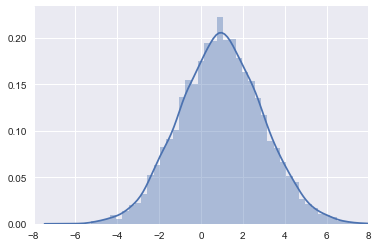

In [13]:
sns.distplot(rv.rvs(size=10000, random_state=0))
plt.xlim(-8, 8)
plt.show()

# 베르누이 분포

In [42]:
theta = 0.6    # 모수 지정
rv = sp.stats.bernoulli(theta)

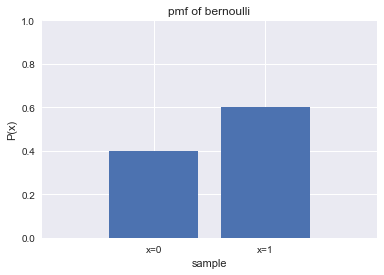

In [45]:
xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("sample")
plt.ylabel("P(x)")
plt.title("pmf of bernoulli")
plt.show()

In [46]:
x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1])

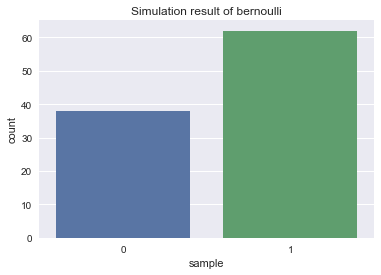

In [47]:
sns.countplot(x)
plt.title("Simulation result of bernoulli")
plt.xlabel("sample")
plt.show()

In [52]:
y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({"theory": rv.pmf(xx), "simulation": y})
df.index = [0, 1]
df

,simulation,theory
0,0.38,0.4
1,0.62,0.6


In [53]:
df2 = df.stack().reset_index()
df2.columns = ["sample", "type", "ratio"]
df2

,sample,type,ratio
0,0,simulation,0.38
1,0,theory,0.40
2,1,simulation,0.62
3,1,theory,0.60


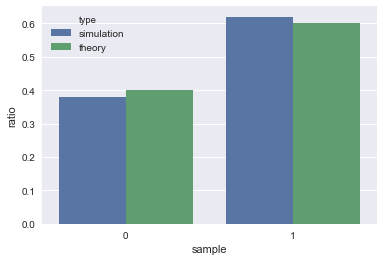

In [51]:
sns.barplot(x="sample", y="ratio", hue="type", data=df2)
plt.show()

$ \theta = 0.5 $

In [149]:
theta = 0.5    # 모수 지정
rv = sp.stats.bernoulli(theta)

샘플의 갯수 = 10

In [150]:
x_10 = rv.rvs(10, random_state=0)
x_10

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [151]:
y = np.bincount(x_10, minlength=2) / float(len(x_10))

df = pd.DataFrame({"theory": rv.pmf(xx), "simulation": y})
df.index = [0, 1]
df

,simulation,theory
0,0.3,0.5
1,0.7,0.5


In [152]:
df2 = df.stack().reset_index()
df2.columns = ["sample value", "type", "ratio"]
df2

,sample value,type,ratio
0,0,simulation,0.3
1,0,theory,0.5
2,1,simulation,0.7
3,1,theory,0.5


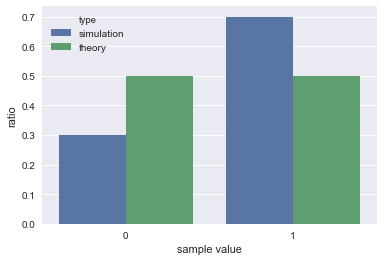

In [153]:
sns.barplot(x="sample value", y="ratio", hue="type", data=df2)
plt.show()

샘플 갯수 = 1000

In [154]:
x_1000 = rv.rvs(1000, random_state=0)
x_1000

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1,

In [155]:
y = np.bincount(x_1000, minlength=2) / float(len(x_1000))

df3 = pd.DataFrame({"theory": rv.pmf(xx), "simulation": y})
df3.index = [0, 1]
df3

,simulation,theory
0,0.517,0.5
1,0.483,0.5


In [156]:
df4 = df3.stack().reset_index()
df4.columns = ["sample value", "type", "ratio"]
df4

,sample value,type,ratio
0,0,simulation,0.517
1,0,theory,0.500
2,1,simulation,0.483
3,1,theory,0.500


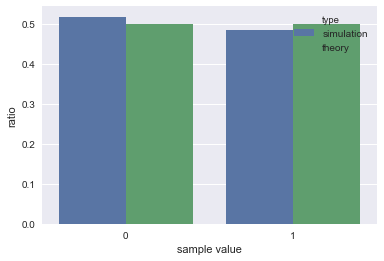

In [157]:
sns.barplot(x="sample value", y="ratio", hue="type", data=df4)
plt.show()

$ \theta = 0.9 $

In [158]:
theta = 0.9    # 모수 지정
rv = sp.stats.bernoulli(theta)

샘플 갯수 = 10

In [159]:
x_10 = rv.rvs(10, random_state=0)
x_10

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [160]:
y = np.bincount(x_10, minlength=2) / float(len(x_10))

df5 = pd.DataFrame({"theory": rv.pmf(xx), "simulation": y})
df5.index = [0, 1]
df5

,simulation,theory
0,0.1,0.1
1,0.9,0.9


In [161]:
df6 = df5.stack().reset_index()
df6.columns = ["sample value", "type", "ratio"]
df6

,sample value,type,ratio
0,0,simulation,0.1
1,0,theory,0.1
2,1,simulation,0.9
3,1,theory,0.9


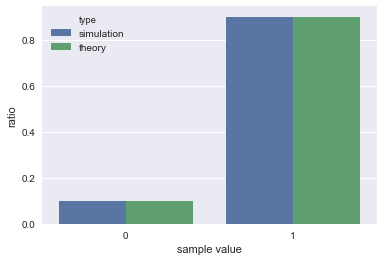

In [162]:
sns.barplot(x="sample value", y="ratio", hue="type", data=df6)
plt.show()

샘플 갯수 = 1000

In [163]:
x_1000 = rv.rvs(1000, random_state=0)
x_1000

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0,

In [164]:
y = np.bincount(x_1000, minlength=2) / float(len(x_1000))

df7 = pd.DataFrame({"theory": rv.pmf(xx), "simulation": y})
df7.index = [0, 1]
df7

,simulation,theory
0,0.108,0.1
1,0.892,0.9


In [165]:
df8 = df7.stack().reset_index()
df8.columns = ["sample value", "type", "ratio"]
df8

,sample value,type,ratio
0,0,simulation,0.108
1,0,theory,0.100
2,1,simulation,0.892
3,1,theory,0.900


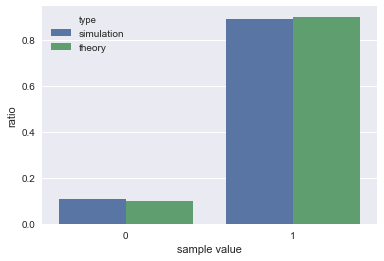

In [166]:
sns.barplot(x="sample value", y="ratio", hue="type", data=df8)
plt.show()

# 이항분포

In [167]:
N = 10
theta = 0.6
rv = sp.stats.binom(N, theta)
rv

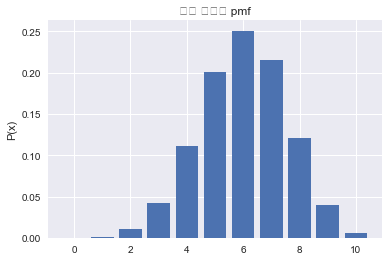

In [168]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.ylabel("P(x)")
plt.title("이항 분포의 pmf")
plt.show()

In [169]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

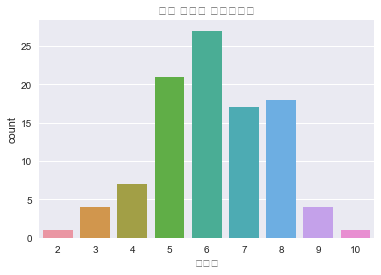

In [170]:
sns.countplot(x)
plt.title("이항 분포의 시뮬레이션")
plt.xlabel("표본값")
plt.show()

In [171]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,0,시뮬레이션,0.000000
1,0,이론,0.000105
2,1,시뮬레이션,0.000000
3,1,이론,0.001573
4,2,시뮬레이션,0.010000
5,2,이론,0.010617
6,3,시뮬레이션,0.040000
7,3,이론,0.042467
8,4,시뮬레이션,0.070000
9,4,이론,0.111477


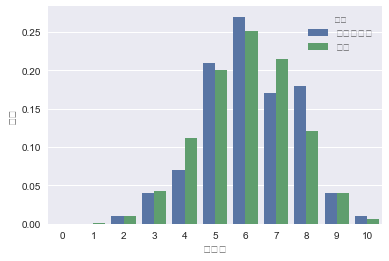

In [172]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.show()

연습 문제 3

이항 확률 분포의 모수가 다음과 같을 경우에 각각 샘플을 생성한 후 기댓값과 분산을 구하고 앞의 예제와 같이 확률 밀도 함수와 비교한 카운트 플롯을 그린다.

샘플의 갯수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.

θ=0.5
 ,  N=5
 
θ=0.9
 ,  N=20
 

In [218]:
N = 5
theta = 0.5
rv = sp.stats.binom(N, theta)

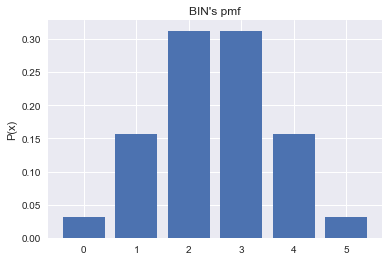

In [219]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.ylabel("P(x)")
plt.title("BIN's pmf")
plt.show()

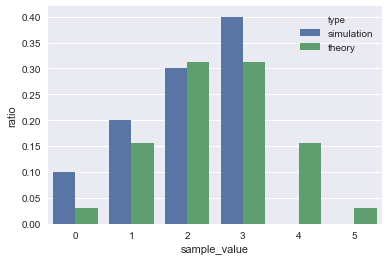

In [235]:
N = 5
theta = 0.5
rv = sp.stats.binom(N, theta)

xx = np.arange(N + 1)
np.random.seed(10)
x = rv.rvs(10)

y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({"theory": rv.pmf(xx), "simulation": y}).stack()
df = df.reset_index()
df.columns = ["sample_value", "type", "ratio"]
df.pivot("sample_value", "type", "ratio")

sns.barplot(x="sample_value", y="ratio", hue="type", data=df)
plt.show()

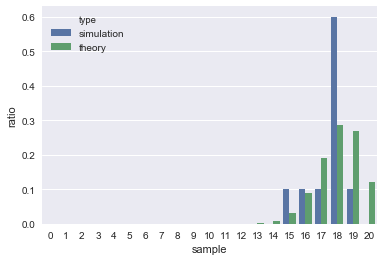

In [224]:
N = 20
theta = 0.9
rv = sp.stats.binom(N, theta)
xx = np.arange(N + 1)
np.random.seed(0)
x = rv.rvs(10)

y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({"theory": rv.pmf(xx), "simulation": y}).stack()
df = df.reset_index()
df.columns = ["sample", "type", "ratio"]
df.pivot("sample", "type", "ratio")

sns.barplot(x="sample", y="ratio", hue="type", data=df)
plt.show()

In [222]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df_1 = pd.DataFrame({"theory": rv.pmf(xx), "simulation": y}).stack()
df_1 = df.reset_index()
df_1.columns = ["sample_value", "type", "ratio"]
df_1.pivot("sample_value", "type", "ratio")
df_1

ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

In [198]:
np.random.seed(0)
x_1000 = rv.rvs(1000)
x_1000

array([3, 3, 3, 3, 2, 3, 2, 4, 4, 2, 3, 3, 3, 4, 1, 1, 0, 4, 3, 4, 5, 3, 2,
       3, 1, 3, 1, 4, 3, 2, 2, 3, 2, 3, 0, 3, 3, 3, 4, 3, 2, 2, 3, 1, 3, 3,
       2, 1, 2, 2, 3, 2, 5, 1, 2, 1, 3, 2, 2, 2, 1, 1, 3, 1, 2, 2, 4, 1, 4,
       1, 5, 2, 5, 3, 3, 1, 2, 1, 2, 1, 2, 2, 1, 3, 3, 2, 3, 1, 3, 4, 2, 3,
       1, 3, 2, 1, 3, 0, 4, 0, 3, 2, 3, 4, 2, 3, 3, 3, 2, 4, 2, 4, 3, 2, 4,
       2, 4, 3, 4, 3, 3, 3, 4, 3, 2, 3, 0, 2, 3, 2, 3, 2, 1, 2, 3, 3, 3, 3,
       3, 2, 4, 2, 2, 4, 3, 3, 1, 4, 3, 5, 1, 4, 1, 3, 1, 4, 3, 3, 2, 1, 3,
       2, 3, 4, 5, 4, 0, 2, 3, 1, 3, 1, 2, 0, 3, 2, 2, 4, 3, 1, 1, 3, 3, 2,
       4, 3, 3, 3, 3, 2, 2, 2, 1, 4, 3, 2, 2, 2, 1, 2, 2, 3, 2, 1, 0, 1, 3,
       2, 3, 4, 5, 2, 3, 2, 0, 3, 2, 2, 3, 4, 3, 4, 2, 3, 1, 4, 3, 2, 4, 3,
       2, 2, 3, 0, 2, 2, 2, 2, 2, 3, 4, 1, 3, 1, 3, 2, 3, 1, 1, 2, 2, 4, 3,
       3, 4, 1, 3, 3, 4, 2, 2, 1, 0, 4, 3, 3, 2, 3, 1, 2, 5, 4, 2, 4, 2, 4,
       4, 3, 3, 4, 2, 4, 3, 0, 2, 1, 5, 2, 2, 3, 2, 1, 4, 2, 3, 2, 1, 4, 5,
       4, 4,

In [205]:
y = np.bincount(x_1000, minlength=N+1)/float(len(x_1000))
df_1 = pd.DataFrame({"theory": rv.pmf(xx), "simulation": y}).stack()
df_1 = df.reset_index()
df_1.columns = ["sample_value", "type", "ratio"]
df_1.pivot("sample_value", "type", "ratio")
df_1

ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

# 카테고리

In [236]:
np.random.seed(0)
theta = np.array([1/6]*6)
X = np.random.multinomial(1, theta, size=20)
X

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

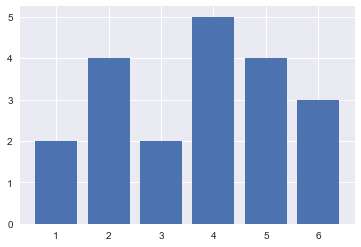

In [237]:
plt.bar(np.arange(1, 7), X.sum(axis=0), align="center")
plt.show()

In [238]:
df = pd.DataFrame({"theoretic": theta, "simulation": X.mean(axis=0)}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df.head()

,value,type,ratio
0,0,simulation,0.100000
1,0,theoretic,0.166667
2,1,simulation,0.200000
3,1,theoretic,0.166667
4,2,simulation,0.100000


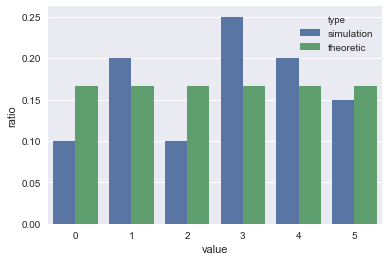

In [239]:
sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()

In [240]:
np.random.seed(0)
theta = np.array([0, 0, 0.1, 0.2, 0.3, 0.4])
X = np.random.multinomial(1, theta, size=20)
X

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0]])

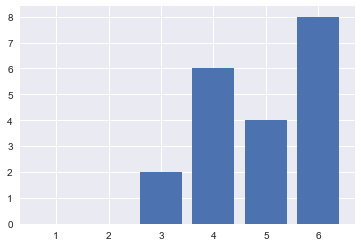

In [241]:
plt.bar(np.arange(1, 7), X.sum(axis=0), align="center")
plt.show()

In [242]:
df = pd.DataFrame({"theoretic": theta, "simulation": X.mean(axis=0)}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df.head()

,value,type,ratio
0,0,simulation,0.0
1,0,theoretic,0.0
2,1,simulation,0.0
3,1,theoretic,0.0
4,2,simulation,0.1


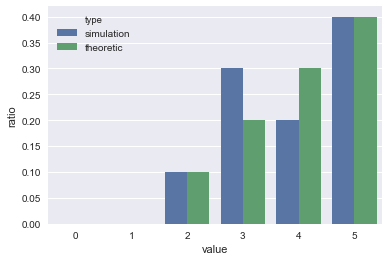

In [243]:
sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()